# Neural Networks Project - Recognizing multi-digit numbers in photographs 

**Problem Description:**

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geolocated patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

**Data Description:**

**The Street View House Numbers (SVHN) Dataset**

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. 

**Link to the dataset:** https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing 

**Objective:**

The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. 

**Steps and Tasks:**

1. Load Dataset 
2. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) 
3. Data fetching and understand the train/val/test splits. (15 points) 
4. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (25 points) 
5. Implement batch normalization for training the neural network(10 points)  
6. Print the classification accuracy metrics (10 points)  

**Solution Approaches:**

The problem has been approached in 2 different ways -

1. Build Fully connected Neural Network using Keras and train the NN using 
    * Weight Initialization
    * Activation Layers
    * BatchNormalization
    * Dropout
2. Build a Fully connected 2D Convoluted Neural Network (CNN) using Keras

## 1. Load the dataset

#### Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import argparse
import scipy.io as sio
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


#### Read the HDF5 file and split into train and test dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
hf = h5py.File('/content/drive/My Drive/DLCP/Project 1/data/SVHN_single_grey1.h5', 'r')

In [7]:
# Get and print list of datasets within the H5 file
datasetNames = [n for n in hf.keys()]
for n in datasetNames:
    print(n)

X_test
X_train
X_val
y_test
y_train
y_val


In [0]:
#Get train and test data from HDF5 file 
X_train = hf['X_train'][:]
y_train = hf['y_train'][:]
X_test  = hf['X_test'][:]
y_test  = hf['y_test'][:]
X_val  = hf['X_val'][:]
y_val  = hf['y_val'][:]

In [9]:
# Get the shape of train data
X_train = np.array(X_train)
print("Shape of X_train is :", X_train.shape)

y_train = np.array(y_train)
print("Shape of y_train is :", y_train.shape)

Shape of X_train is : (42000, 32, 32)
Shape of y_train is : (42000,)


In [10]:
# Get the shape of test data
X_test = np.array(X_test)
print("Shape of X_test is :", X_test.shape)

y_test = np.array(y_test)
print("Shape of y_test is :", y_test.shape)

Shape of X_test is : (18000, 32, 32)
Shape of y_test is : (18000,)


In [11]:
# Get the shape of val data
X_val = np.array(X_val)
print("Shape of X_val is :", X_val.shape)

y_val = np.array(y_val)
print("Shape of y_val is :", y_val.shape)

Shape of X_val is : (60000, 32, 32)
Shape of y_val is : (60000,)


In [0]:
#Close the file
hf.close()

## 2. Data Pre-processing

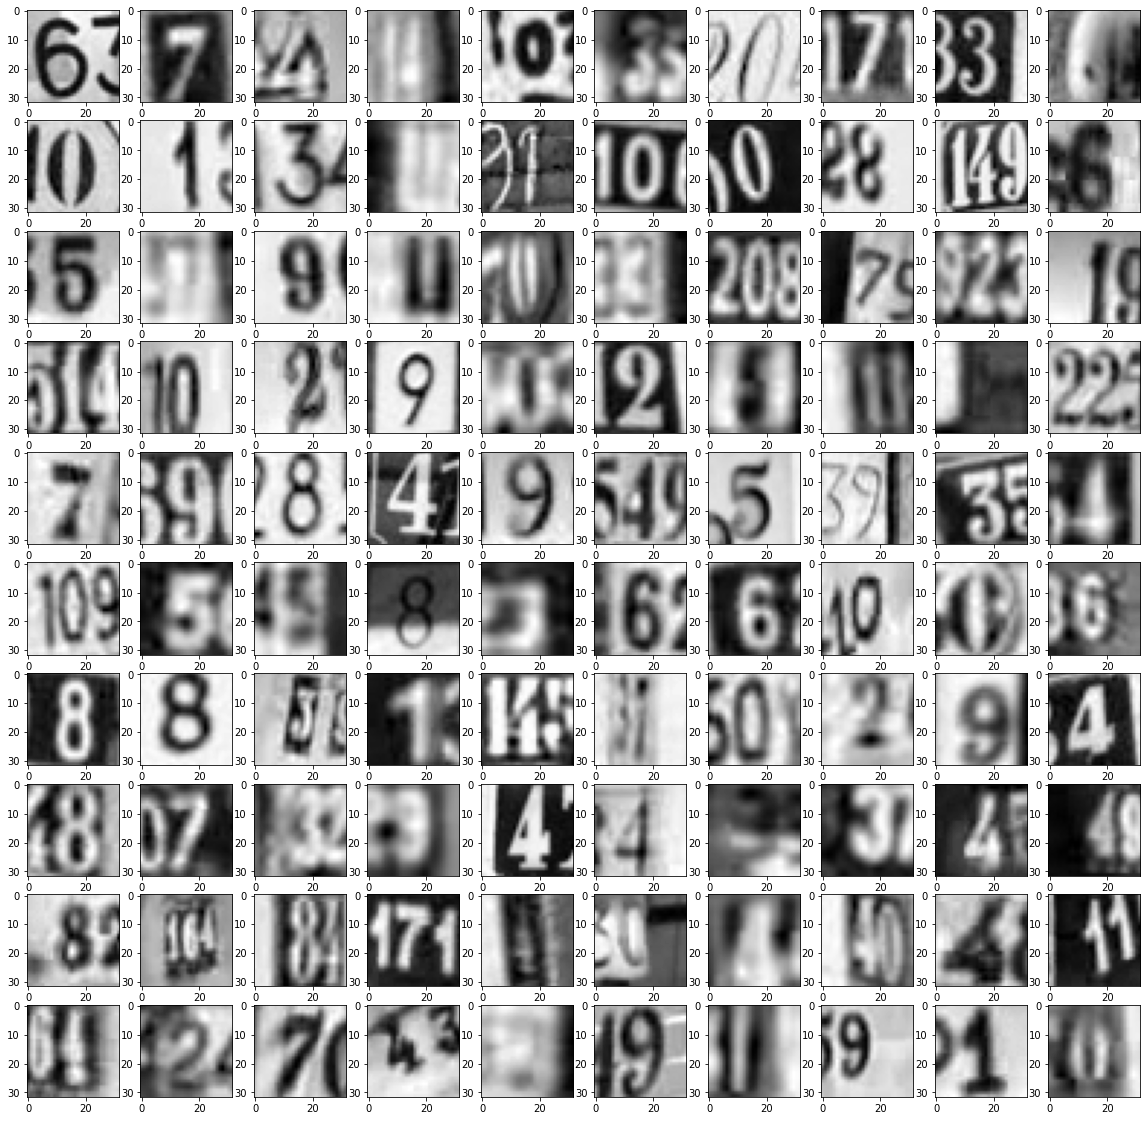

label for each of the above image: [6 7 4 4 0 3 0 7 3 1 0 1 3 1 1 0 0 8 4 6 5 7 9 1 0 3 0 7 2 1 1 0 2 9 0 2 5
 1 3 2 7 9 8 4 9 4 5 9 3 4 0 5 5 8 3 6 6 0 0 6 8 8 3 1 4 7 0 2 9 4 8 7 3 9
 4 4 3 3 4 4 8 6 8 7 4 0 4 4 4 1 4 2 7 4 2 9 1 9 1]


In [13]:
# visualizing the first 100 images in the dataset and their labels

w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()
print('label for each of the above image: %s' % (y_train[1:100]))

In [0]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))

In [0]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [16]:
#print the shape of the datasets post reshaping
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


## Approach 1 - Build a Neural Network using Keras and apply various training methods

#### Build a basic NN model 

In [0]:
keras_model = Sequential()

In [0]:
# Input Layer
#Adding Input layer  and activation functions Sigmoid
keras_model.add(Dense(512, input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('sigmoid'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(300))
#Adding Activation function
keras_model.add(Activation('sigmoid'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(200))
#Adding Activation function
keras_model.add(Activation('sigmoid'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(150))
#Adding Activation function
keras_model.add(Activation('sigmoid'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(100))
#Adding Activation function
keras_model.add(Activation('sigmoid'))

#Hidden Layer 5
#Adding fifth Hidden layer
keras_model.add(Dense(50))
#Adding Activation function
keras_model.add(Activation('sigmoid'))

#Hidden Layer 6
#Adding sixth Hidden layer
keras_model.add(Dense(30))
#Adding Activation function
keras_model.add(Activation('sigmoid'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [19]:
#To visualize neural network
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               153900    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               60200     
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)              

#### Using SGD optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [0]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history = keras_model.fit(X_train, y_train, batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 2s 58us/step - loss: 2.3169 - accuracy: 0.0997
Epoch 2/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3029 - accuracy: 0.1011
Epoch 3/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3028 - accuracy: 0.0999
Epoch 4/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3027 - accuracy: 0.0990
Epoch 5/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3027 - accuracy: 0.1012
Epoch 6/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3028 - accuracy: 0.1002
Epoch 7/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3028 - accuracy: 0.0976
Epoch 8/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3028 - accuracy: 0.0990
Epoch 9/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3027 - accuracy: 0.0994
Epoch 10/10
42000/42000 [==============================

#### Using adam optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [0]:
# compiling the ANN classifier using ADAM optimizer
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
history = keras_model.fit(X_train, y_train, batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 1s 29us/step - loss: 2.3049 - accuracy: 0.1012
Epoch 2/10
42000/42000 [==============================] - 1s 25us/step - loss: 2.3041 - accuracy: 0.1017
Epoch 3/10
42000/42000 [==============================] - 1s 25us/step - loss: 2.3045 - accuracy: 0.0965
Epoch 4/10
42000/42000 [==============================] - 1s 25us/step - loss: 2.3038 - accuracy: 0.1010
Epoch 5/10
42000/42000 [==============================] - 1s 25us/step - loss: 2.3039 - accuracy: 0.1023
Epoch 6/10
42000/42000 [==============================] - 1s 25us/step - loss: 2.3037 - accuracy: 0.0999
Epoch 7/10
42000/42000 [==============================] - 1s 25us/step - loss: 2.3040 - accuracy: 0.1008
Epoch 8/10
42000/42000 [==============================] - 1s 24us/step - loss: 2.3040 - accuracy: 0.0991
Epoch 9/10
42000/42000 [==============================] - 1s 25us/step - loss: 2.3036 - accuracy: 0.0989
Epoch 10/10
42000/42000 [==============================

**Observation:** The accuracy of the model is very low either using adam or sgd.

In [0]:
def convert_to_label(test_data):
#Converting target categories to label
    test = list()
    for i in range(len(test_data)):
        test.append(np.argmax(test_data[i]))
    return(test)


In [0]:
def accuracy(pred, test):
    a = accuracy_score(pred, test)
    print('Accuracy is:', a*100)

In [0]:
# Print the precision and recall, among other metrics
def class_report(pred, test):
    print(classification_report(pred, test))


In [0]:
# Print the confusion matrix
def conf_matrix(pred, test):
    cm_test = pd.DataFrame(confusion_matrix(pred, test).T,
                           index=['0','1','2','3','4','5','6','7','8','9'], 
                           columns=['0','1','2','3','4','5','6','7','8','9'])
    cm_test.index.name = "Predicted"
    cm_test.columns.name = "True"
    print(cm_test)

In [0]:
#Plot the train and test accuracy
def accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [0]:
#Plot the train and test loss
def loss_plot(history):
    plt.plot(history.history['loss']) 
    plt.plot(history.history['val_loss']) 
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Test'], loc='upper left') 
    plt.show()

#### Now, try to change the learning rate in SGD optimizer

As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [31]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.sgd(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 1s 20us/step - loss: 2.3030 - accuracy: 0.1019
Epoch 2/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3030 - accuracy: 0.1019
Epoch 3/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3030 - accuracy: 0.1019
Epoch 4/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3030 - accuracy: 0.1019
Epoch 5/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3029 - accuracy: 0.1019
Epoch 6/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3029 - accuracy: 0.1019
Epoch 7/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3029 - accuracy: 0.1019
Epoch 8/10
42000/42000 [==============================] - 1s 18us/step - loss: 2.3029 - accuracy: 0.1019
Epoch 9/10
42000/42000 [==============================] - 1s 17us/step - loss: 2.3029 - accuracy: 0.1019
Epoch 10/10
42000/42000 [==============================

In [32]:
# Fitting the ANN to the validation data
history = keras_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 1s 35us/step - loss: 2.3029 - accuracy: 0.1019 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/10
42000/42000 [==============================] - 1s 34us/step - loss: 2.3029 - accuracy: 0.1019 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/10
42000/42000 [==============================] - 1s 34us/step - loss: 2.3029 - accuracy: 0.1019 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 4/10
42000/42000 [==============================] - 1s 34us/step - loss: 2.3028 - accuracy: 0.1019 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 5/10
42000/42000 [==============================] - 1s 34us/step - loss: 2.3028 - accuracy: 0.1019 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/10
42000/42000 [==============================] - 1s 34us/step - loss: 2.3028 - accuracy: 0.1019 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 7/10
42000/42000 [==============================] - 1s 35us/st

In [33]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = keras_model.predict_classes(X_val)

test = convert_to_label(y_val)

accuracy(y_pred, test)

Accuracy is: 10.0


In [34]:
#Plot confusion matrix
conf_matrix(y_pred, test)

True       0  1  2     3  4  5  6  7  8  9
Predicted                                 
0          0  0  0  6000  0  0  0  0  0  0
1          0  0  0  6000  0  0  0  0  0  0
2          0  0  0  6000  0  0  0  0  0  0
3          0  0  0  6000  0  0  0  0  0  0
4          0  0  0  6000  0  0  0  0  0  0
5          0  0  0  6000  0  0  0  0  0  0
6          0  0  0  6000  0  0  0  0  0  0
7          0  0  0  6000  0  0  0  0  0  0
8          0  0  0  6000  0  0  0  0  0  0
9          0  0  0  6000  0  0  0  0  0  0


In [35]:
#Print classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.10      0.18     60000
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     60000
   macro avg       0.10      0.01      0.02     60000
weighted avg       1.00      0.10      0.18     60000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
#Evaluate model
results = keras_model.evaluate(X_val, y_val)

60000/60000 [==============================] - 3s 52us/step


In [37]:
print('Val accuracy using simple NN and SGD: ', results[1] * 100)

Val accuracy using simple NN and SGD:  10.000000149011612


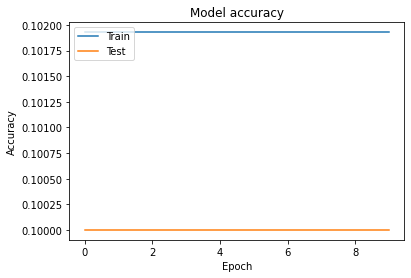

In [38]:
#Plot train vs test accuracy
accuracy_plot(history)

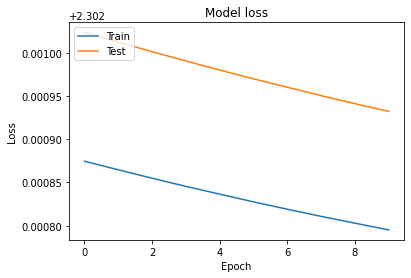

In [39]:
#Plot train vs test loss
loss_plot(history)

In [40]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN with SGD'], 'accuracy': results[1] * 100},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.0


**Observation:** The accuracy of the model on val data using sgd with learning rate=0.0001 is improving a bit but not much.

#### Now, let's try to change the learning rate in ADAM optimizer

As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [0]:
#Setting the learning rate  and decay in adam
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [42]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 1s 28us/step - loss: 2.3028 - accuracy: 0.1010
Epoch 2/10
42000/42000 [==============================] - 1s 24us/step - loss: 2.3028 - accuracy: 0.1005
Epoch 3/10
42000/42000 [==============================] - 1s 24us/step - loss: 2.3028 - accuracy: 0.0998
Epoch 4/10
42000/42000 [==============================] - 1s 24us/step - loss: 2.3027 - accuracy: 0.1008
Epoch 5/10
42000/42000 [==============================] - 1s 24us/step - loss: 2.3027 - accuracy: 0.1003
Epoch 6/10
42000/42000 [==============================] - 1s 24us/step - loss: 2.3027 - accuracy: 0.1013
Epoch 7/10
42000/42000 [==============================] - 1s 24us/step - loss: 2.3027 - accuracy: 0.0997
Epoch 8/10
42000/42000 [==============================] - 1s 24us/step - loss: 2.3028 - accuracy: 0.0978
Epoch 9/10
42000/42000 [==============================] - 1s 24us/step - loss: 2.3027 - accuracy: 0.0993
Epoch 10/10
42000/42000 [==============================

In [43]:
# Fitting the ANN to the validation data
history = keras_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 40us/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
42000/42000 [==============================] - 2s 43us/step - loss: 2.3027 - accuracy: 0.1015 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
42000/42000 [==============================] - 2s 42us/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
42000/42000 [==============================] - 2s 43us/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
42000/42000 [==============================] - 2s 42us/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
42000/42000 [==============================] - 2s 42us/step - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
42000/42000 [==============================] - 2s 42us/st

**Observation:** The accuracy of the model on val data using ADAM with learning rate=0.0001 has shown significant improvement.

In [44]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = keras_model.predict_classes(X_val)

test = convert_to_label(y_val)

accuracy(y_pred, test)

Accuracy is: 10.0


In [45]:
#Plot the confusion matrix
conf_matrix(y_pred, test)

True       0  1  2  3  4     5  6  7  8  9
Predicted                                 
0          0  0  0  0  0  6000  0  0  0  0
1          0  0  0  0  0  6000  0  0  0  0
2          0  0  0  0  0  6000  0  0  0  0
3          0  0  0  0  0  6000  0  0  0  0
4          0  0  0  0  0  6000  0  0  0  0
5          0  0  0  0  0  6000  0  0  0  0
6          0  0  0  0  0  6000  0  0  0  0
7          0  0  0  0  0  6000  0  0  0  0
8          0  0  0  0  0  6000  0  0  0  0
9          0  0  0  0  0  6000  0  0  0  0


In [46]:
#Print the classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.10      0.18     60000
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     60000
   macro avg       0.10      0.01      0.02     60000
weighted avg       1.00      0.10      0.18     60000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
#Evaluate the model and calculate accuracy
results = keras_model.evaluate(X_val, y_val)

60000/60000 [==============================] - 3s 51us/step


In [48]:
print('Val accuracy using simple NN and Adam: ', results[1] * 100)

Val accuracy using simple NN and Adam:  10.000000149011612


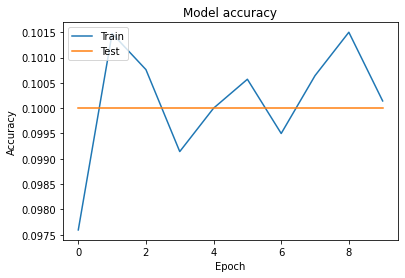

In [49]:
#Plot train Vs test accuracy
accuracy_plot(history)

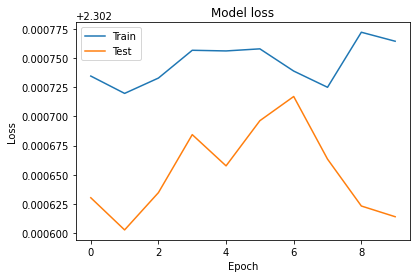

In [50]:
#Plot train vs test loss
loss_plot(history)

In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN with Adam'], 'accuracy': results[1] * 100},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.0
2,NN with Adam,10.0


**Observation:**  The accuracy of the model on val data using sgd and adam with learning rate=0.0001 is improving a bit but not much. We would need to perform the next set of process to train the model.

### 4. Training the Neural Networks

#### 1. Weight Initialization

In [0]:
keras_model_1 = Sequential()

# Input Layer
#Adding Input layer and activation functions sigmoid
keras_model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model_1.add(Activation('sigmoid'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(300, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_1.add(Activation('sigmoid'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(200, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_1.add(Activation('sigmoid'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(150, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_1.add(Activation('sigmoid'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(100, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_1.add(Activation('sigmoid'))

#Hidden Layer 5
#Adding fifth Hidden layer
keras_model_1.add(Dense(50, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_1.add(Activation('sigmoid'))

#Hidden Layer 6
#Adding sixth Hidden layer
keras_model_1.add(Dense(30, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_1.add(Activation('sigmoid'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [53]:
#To visualize neural network
keras_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               153900    
_________________________________________________________________
activation_10 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 200)               60200     
_________________________________________________________________
activation_11 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)              

In [0]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.sgd(lr = 0.001)
# compiling the ANN classifier
keras_model_1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [55]:
#Using val data as validation data.
history = keras_model_1.fit(X_train, y_train, epochs=100, batch_size=200)

Epoch 1/100
42000/42000 [==============================] - 1s 20us/step - loss: 2.4271 - accuracy: 0.0997
Epoch 2/100
42000/42000 [==============================] - 1s 18us/step - loss: 2.3827 - accuracy: 0.0997
Epoch 3/100
42000/42000 [==============================] - 1s 18us/step - loss: 2.3548 - accuracy: 0.0997
Epoch 4/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3369 - accuracy: 0.0997
Epoch 5/100
42000/42000 [==============================] - 1s 18us/step - loss: 2.3253 - accuracy: 0.0997
Epoch 6/100
42000/42000 [==============================] - 1s 18us/step - loss: 2.3177 - accuracy: 0.0997
Epoch 7/100
42000/42000 [==============================] - 1s 18us/step - loss: 2.3127 - accuracy: 0.0997
Epoch 8/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3093 - accuracy: 0.0997
Epoch 9/100
42000/42000 [==============================] - 1s 18us/step - loss: 2.3071 - accuracy: 0.0997
Epoch 10/100
42000/42000 [====================

In [56]:
#Using val data as validation data.
history = keras_model_1.fit(X_train, y_train,validation_data = (X_val,y_val), epochs=100, batch_size=200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 34us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/100
42000/42000 [==============================] - 1s 34us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/100
42000/42000 [==============================] - 1s 33us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/100
42000/42000 [==============================] - 1s 33us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/100
42000/42000 [==============================] - 1s 33us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/100
42000/42000 [==============================] - 1s 33us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/100
42000/42000 [==============================] - 1s 

In [57]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = keras_model_1.predict_classes(X_val)

test = convert_to_label(y_val)

accuracy(y_pred, test)

Accuracy is: 10.0


In [58]:
#Plot the confusion matrix
conf_matrix(y_pred, test)

True       0  1  2     3  4  5  6  7  8  9
Predicted                                 
0          0  0  0  6000  0  0  0  0  0  0
1          0  0  0  6000  0  0  0  0  0  0
2          0  0  0  6000  0  0  0  0  0  0
3          0  0  0  6000  0  0  0  0  0  0
4          0  0  0  6000  0  0  0  0  0  0
5          0  0  0  6000  0  0  0  0  0  0
6          0  0  0  6000  0  0  0  0  0  0
7          0  0  0  6000  0  0  0  0  0  0
8          0  0  0  6000  0  0  0  0  0  0
9          0  0  0  6000  0  0  0  0  0  0


In [59]:
#Print the classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.10      0.18     60000
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     60000
   macro avg       0.10      0.01      0.02     60000
weighted avg       1.00      0.10      0.18     60000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#Evaluate the model and calculate accuracy
results = keras_model_1.evaluate(X_val, y_val)

60000/60000 [==============================] - 3s 52us/step


In [61]:
print('Val accuracy using wt_init and SGD: ', results[1] * 100)

Val accuracy using wt_init and SGD:  10.000000149011612


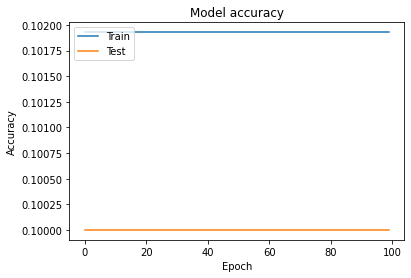

In [62]:
#Plot train vs test accuracy
accuracy_plot(history)

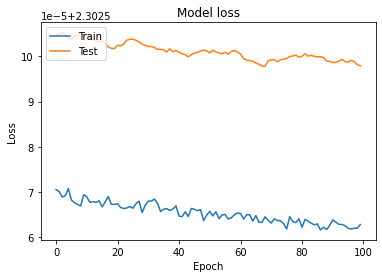

In [63]:
#Plot train vs test loss
loss_plot(history)

In [64]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_wt_init_with SGD'], 'accuracy': results[1] * 100},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.0
2,NN with Adam,10.0
3,NN_wt_init_with SGD,10.0


#### Using Adam optimizer, repeat the steps above

In [0]:
#Setting the learning rate  and decay in sgd
adam = optimizers.Adam(lr = 0.001)
# compiling the ANN classifier
keras_model_1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [67]:
#Using val data as validation data.
history = keras_model_1.fit(X_train, y_train, epochs=100, batch_size=200)

Epoch 1/100
42000/42000 [==============================] - 1s 24us/step - loss: 2.3040 - accuracy: 0.1002
Epoch 2/100
42000/42000 [==============================] - 1s 24us/step - loss: 2.3043 - accuracy: 0.0988
Epoch 3/100
42000/42000 [==============================] - 1s 24us/step - loss: 2.3041 - accuracy: 0.0980
Epoch 4/100
42000/42000 [==============================] - 1s 25us/step - loss: 2.3042 - accuracy: 0.0981
Epoch 5/100
42000/42000 [==============================] - 1s 24us/step - loss: 2.3039 - accuracy: 0.0996
Epoch 6/100
42000/42000 [==============================] - 1s 25us/step - loss: 2.3036 - accuracy: 0.0985
Epoch 7/100
42000/42000 [==============================] - 1s 24us/step - loss: 2.3039 - accuracy: 0.0990
Epoch 8/100
42000/42000 [==============================] - 1s 24us/step - loss: 2.3038 - accuracy: 0.0965
Epoch 9/100
42000/42000 [==============================] - 1s 24us/step - loss: 2.3036 - accuracy: 0.1003
Epoch 10/100
42000/42000 [====================

In [68]:
#Using val data as validation data.
history = keras_model_1.fit(X_train, y_train,validation_data = (X_val,y_val), epochs=100, batch_size=200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 39us/step - loss: 2.3029 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/100
42000/42000 [==============================] - 2s 38us/step - loss: 2.3029 - accuracy: 0.1003 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/100
42000/42000 [==============================] - 2s 39us/step - loss: 2.3029 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/100
42000/42000 [==============================] - 2s 39us/step - loss: 2.3029 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/100
42000/42000 [==============================] - 2s 39us/step - loss: 2.3029 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/100
42000/42000 [==============================] - 2s 39us/step - loss: 2.3029 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/100
42000/42000 [==============================] - 2s 

In [69]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = keras_model_1.predict_classes(X_val)

test = convert_to_label(y_val)

accuracy(y_pred, test)

Accuracy is: 10.0


In [70]:
#Plot the confusion matrix
conf_matrix(y_pred, test)

True       0  1  2     3  4  5  6  7  8  9
Predicted                                 
0          0  0  0  6000  0  0  0  0  0  0
1          0  0  0  6000  0  0  0  0  0  0
2          0  0  0  6000  0  0  0  0  0  0
3          0  0  0  6000  0  0  0  0  0  0
4          0  0  0  6000  0  0  0  0  0  0
5          0  0  0  6000  0  0  0  0  0  0
6          0  0  0  6000  0  0  0  0  0  0
7          0  0  0  6000  0  0  0  0  0  0
8          0  0  0  6000  0  0  0  0  0  0
9          0  0  0  6000  0  0  0  0  0  0


In [71]:
#Print the classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.10      0.18     60000
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     60000
   macro avg       0.10      0.01      0.02     60000
weighted avg       1.00      0.10      0.18     60000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
#Evaluate the model and calculate accuracy
results = keras_model_1.evaluate(X_val, y_val)

60000/60000 [==============================] - 3s 50us/step


In [73]:
print('Val accuracy using wt_init and Adam: ', results[1] * 100)

Val accuracy using wt_init and Adam:  10.000000149011612


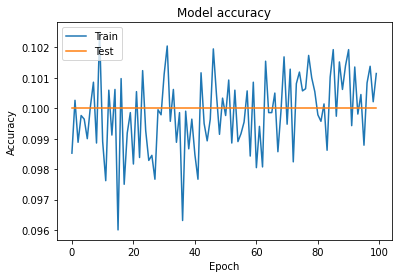

In [74]:
#Plot train Vs test accuracy
accuracy_plot(history)

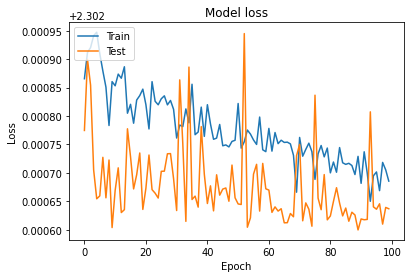

In [75]:
#Plot train vs test loss
loss_plot(history)

In [76]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_wt_init_with Adam'], 'accuracy': results[1]*100},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.0
2,NN with Adam,10.0
3,NN_wt_init_with SGD,10.0
4,NN_wt_init_with Adam,10.0


**Observation:** There is not much of a difference in the performance even by using initializers. Lets try adding activation layers. 

#### 2. Nonlinearity (Activation function)

In [0]:
keras_model_2 = Sequential()

# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_2.add(Dense(300, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_2.add(Dense(200, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 3   -----------------> commented this layer since the loss was NaN
#Adding third Hidden layer
#keras_model_2.add(Dense(150, kernel_initializer='he_normal'))
#Adding Activation function
#keras_model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
#keras_model_2.add(Dense(100, kernel_initializer='he_normal'))
#Adding Activation function
#keras_model_2.add(Activation('relu'))

#Hidden Layer 5
#Adding fifth Hidden layer
#keras_model_2.add(Dense(50, kernel_initializer='he_normal'))
#Adding Activation function
#keras_model_2.add(Activation('relu'))

#Hidden Layer 6
#Adding sixth Hidden layer
keras_model_2.add(Dense(30, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [104]:
#To visualize neural network
keras_model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_43 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 300)               153900    
_________________________________________________________________
activation_44 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 200)               60200     
_________________________________________________________________
activation_45 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 30)               

In [0]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.sgd(lr = 0.001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [108]:
#fit model.
history = keras_model_2.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
42000/42000 [==============================] - 1s 18us/step - loss: 36962492445864998882351513600.0000 - accuracy: 0.1006
Epoch 2/10
42000/42000 [==============================] - 1s 16us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 3/10
42000/42000 [==============================] - 1s 16us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 4/10
42000/42000 [==============================] - 1s 16us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 5/10
42000/42000 [==============================] - 1s 16us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 6/10
42000/42000 [==============================] - 1s 16us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 7/10
42000/42000 [==============================] - 1s 16us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 8/10
42000/42000 [==============================] - 1s 16us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 9/10
42000/42000 [==============================] - 1s 16us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 10/10
42000/42000 [==

In [109]:
#Using val data as validation data.
history = keras_model_2.fit(X_train, y_train,validation_data = (X_val,y_val), epochs=100, batch_size=200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 33us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/100
42000/42000 [==============================] - 1s 33us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/100
42000/42000 [==============================] - 1s 32us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/100
42000/42000 [==============================] - 1s 32us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/100
42000/42000 [==============================] - 1s 32us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/100
42000/42000 [==============================] - 1s 32us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/100
42000/42000 [==============================] - 1s 

In [110]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = keras_model_2.predict_classes(X_val)

test = convert_to_label(y_val)

accuracy(y_pred, test)

Accuracy is: 10.0


In [111]:
#Plot the confusion matrix
conf_matrix(y_pred, test)

True       0  1  2     3  4  5  6  7  8  9
Predicted                                 
0          0  0  0  6000  0  0  0  0  0  0
1          0  0  0  6000  0  0  0  0  0  0
2          0  0  0  6000  0  0  0  0  0  0
3          0  0  0  6000  0  0  0  0  0  0
4          0  0  0  6000  0  0  0  0  0  0
5          0  0  0  6000  0  0  0  0  0  0
6          0  0  0  6000  0  0  0  0  0  0
7          0  0  0  6000  0  0  0  0  0  0
8          0  0  0  6000  0  0  0  0  0  0
9          0  0  0  6000  0  0  0  0  0  0


In [112]:
#Print the classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.10      0.18     60000
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     60000
   macro avg       0.10      0.01      0.02     60000
weighted avg       1.00      0.10      0.18     60000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
#Evaluate the model and calculate accuracy
results = keras_model_2.evaluate(X_val, y_val)

60000/60000 [==============================] - 3s 53us/step


In [114]:
print('Val accuracy using Relu and SGD: ', results[1] * 100)

Val accuracy using Relu and SGD:  10.000000149011612


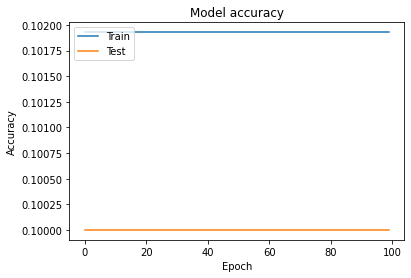

In [115]:
#Plot train Vs test accuracy
accuracy_plot(history)

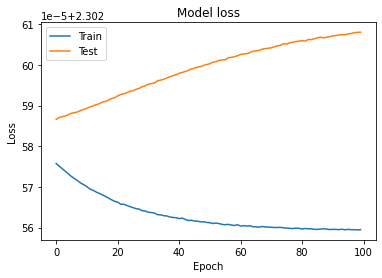

In [116]:
#Plot train Vs test loss
loss_plot(history)

In [117]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Relu_activation_with SGD'], 'accuracy': results[1]*100},index={'5'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.0
2,NN with Adam,10.0
3,NN_wt_init_with SGD,10.0
4,NN_wt_init_with Adam,10.0
5,NN_Relu_activation_with SGD,10.0


#### Using Adam optimizer, repeat the steps above

In [0]:
#Setting the learning rate  and decay in sgd
adam = optimizers.Adam(lr = 0.001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [119]:
#Fit the model.
history = keras_model_2.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
42000/42000 [==============================] - 1s 23us/step - loss: 2.3027 - accuracy: 0.1013
Epoch 2/10
42000/42000 [==============================] - 1s 20us/step - loss: 2.3026 - accuracy: 0.0999
Epoch 3/10
42000/42000 [==============================] - 1s 20us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 4/10
42000/42000 [==============================] - 1s 20us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 5/10
42000/42000 [==============================] - 1s 20us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 6/10
42000/42000 [==============================] - 1s 20us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 7/10
42000/42000 [==============================] - 1s 20us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 8/10
42000/42000 [==============================] - 1s 20us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 9/10
42000/42000 [==============================] - 1s 20us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 10/10
42000/42000 [==============================

In [120]:
#Using val data as validation data.
history = keras_model_2.fit(X_train, y_train,validation_data = (X_val,y_val), epochs=100, batch_size=200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 37us/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/100
42000/42000 [==============================] - 1s 35us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/100
42000/42000 [==============================] - 1s 35us/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/100
42000/42000 [==============================] - 1s 35us/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/100
42000/42000 [==============================] - 1s 35us/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/100
42000/42000 [==============================] - 1s 35us/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/100
42000/42000 [==============================] - 1s 

In [121]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = keras_model_2.predict_classes(X_val)

test = convert_to_label(y_val)

accuracy(y_pred, test)

Accuracy is: 10.0


In [122]:
#Plot the confusion matrix
conf_matrix(y_pred, test)

True       0  1  2     3  4  5  6  7  8  9
Predicted                                 
0          0  0  0  6000  0  0  0  0  0  0
1          0  0  0  6000  0  0  0  0  0  0
2          0  0  0  6000  0  0  0  0  0  0
3          0  0  0  6000  0  0  0  0  0  0
4          0  0  0  6000  0  0  0  0  0  0
5          0  0  0  6000  0  0  0  0  0  0
6          0  0  0  6000  0  0  0  0  0  0
7          0  0  0  6000  0  0  0  0  0  0
8          0  0  0  6000  0  0  0  0  0  0
9          0  0  0  6000  0  0  0  0  0  0


In [123]:
#Print classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.10      0.18     60000
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     60000
   macro avg       0.10      0.01      0.02     60000
weighted avg       1.00      0.10      0.18     60000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
#Evaluate the model and calculate accuracy
results = keras_model_2.evaluate(X_val, y_val)

60000/60000 [==============================] - 3s 48us/step


In [125]:
print('Val accuracy using Relu and Adam: ', results[1] * 100)

Val accuracy using Relu and Adam:  10.000000149011612


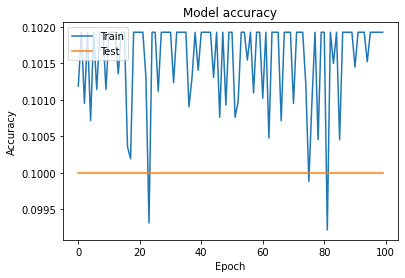

In [126]:
#Plot train Vs test accuracy
accuracy_plot(history)

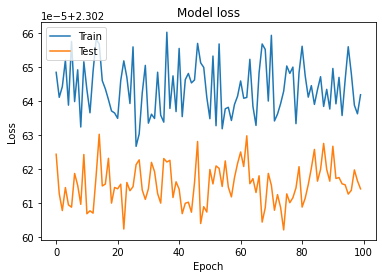

In [127]:
#Plot train Vs test loss
loss_plot(history)

In [128]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Relu_activation_with Adam'], 'accuracy': results[1]*100},index={'6'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.0
2,NN with Adam,10.0
3,NN_wt_init_with SGD,10.0
4,NN_wt_init_with Adam,10.0
5,NN_Relu_activation_with SGD,10.0
6,NN_Relu_activation_with Adam,10.0


**Observation:** The accuracy still needs to be improved.

#### 3. Batch Normalization

In [0]:
keras_model_3 = Sequential()

# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(300, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(200, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(150, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(100, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 5
#Adding fifth Hidden layer
keras_model_3.add(Dense(50, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 6
#Adding sixth Hidden layer
keras_model_3.add(Dense(30, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [130]:
#To visualize neural network
keras_model_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_48 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 300)               153900    
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
activation_49 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 200)              

In [0]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.sgd(lr = 0.001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [132]:
#Fit the model.
history = keras_model_3.fit(X_train, y_train, epochs=50, batch_size=200)

Epoch 1/50
42000/42000 [==============================] - 2s 56us/step - loss: 2.5183 - accuracy: 0.1051
Epoch 2/50
42000/42000 [==============================] - 2s 40us/step - loss: 2.4315 - accuracy: 0.1200
Epoch 3/50
42000/42000 [==============================] - 2s 40us/step - loss: 2.3655 - accuracy: 0.1355
Epoch 4/50
42000/42000 [==============================] - 2s 40us/step - loss: 2.3150 - accuracy: 0.1519
Epoch 5/50
42000/42000 [==============================] - 2s 40us/step - loss: 2.2691 - accuracy: 0.1661
Epoch 6/50
42000/42000 [==============================] - 2s 40us/step - loss: 2.2285 - accuracy: 0.1830
Epoch 7/50
42000/42000 [==============================] - 2s 39us/step - loss: 2.1886 - accuracy: 0.2014
Epoch 8/50
42000/42000 [==============================] - 2s 41us/step - loss: 2.1541 - accuracy: 0.2195
Epoch 9/50
42000/42000 [==============================] - 2s 40us/step - loss: 2.1185 - accuracy: 0.2370
Epoch 10/50
42000/42000 [==============================

In [133]:
#Using val data as validation data.
history = keras_model_3.fit(X_train, y_train,validation_data = (X_val,y_val), epochs=50, batch_size=200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 3s 65us/step - loss: 1.1442 - accuracy: 0.6500 - val_loss: 1.1487 - val_accuracy: 0.6485
Epoch 2/50
42000/42000 [==============================] - 3s 62us/step - loss: 1.1312 - accuracy: 0.6536 - val_loss: 1.1313 - val_accuracy: 0.6546
Epoch 3/50
42000/42000 [==============================] - 3s 62us/step - loss: 1.1192 - accuracy: 0.6567 - val_loss: 1.1226 - val_accuracy: 0.6580
Epoch 4/50
42000/42000 [==============================] - 3s 63us/step - loss: 1.1067 - accuracy: 0.6609 - val_loss: 1.1028 - val_accuracy: 0.6628
Epoch 5/50
42000/42000 [==============================] - 3s 63us/step - loss: 1.0925 - accuracy: 0.6660 - val_loss: 1.0972 - val_accuracy: 0.6649
Epoch 6/50
42000/42000 [==============================] - 3s 63us/step - loss: 1.0799 - accuracy: 0.6695 - val_loss: 1.0854 - val_accuracy: 0.6698
Epoch 7/50
42000/42000 [==============================] - 3s 63us/st

In [134]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = keras_model_3.predict_classes(X_val)

test = convert_to_label(y_val)

accuracy(y_pred, test)

Accuracy is: 76.95666666666666


In [135]:
#Plot confusion matrix
conf_matrix(y_pred, test)

True          0     1     2     3     4     5     6     7     8     9
Predicted                                                            
0          4693    77    90    63   109    53   176    62   345   332
1            79  4983    67   158   199    84    85   149   125    71
2           162   177  4587   159   126    57    53   354   103   222
3            81   311   125  4228    64   576    63   121   204   227
4           118   275    76    68  4833    85   248    55   102   140
5            75   133    52   382    97  4564   212    38   199   248
6           216   143    39    54   251   225  4487    27   474    84
7           127   254   320   149    73    40    30  4867    36   104
8           303   227    66   122   112   202   447    33  4169   319
9           320   122   107   117   105   151    56    62   197  4763


In [136]:
#Print classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      6174
           1       0.83      0.74      0.78      6702
           2       0.76      0.83      0.80      5529
           3       0.70      0.77      0.74      5500
           4       0.81      0.81      0.81      5969
           5       0.76      0.76      0.76      6037
           6       0.75      0.77      0.76      5857
           7       0.81      0.84      0.83      5768
           8       0.69      0.70      0.70      5954
           9       0.79      0.73      0.76      6510

    accuracy                           0.77     60000
   macro avg       0.77      0.77      0.77     60000
weighted avg       0.77      0.77      0.77     60000



In [137]:
#Evaluate model and claculate accuracy
results = keras_model_3.evaluate(X_val, y_val)

60000/60000 [==============================] - 5s 84us/step


In [138]:
print('Val accuracy using batch_norm and SGD: ', results[1] * 100)

Val accuracy using batch_norm and SGD:  76.95666551589966


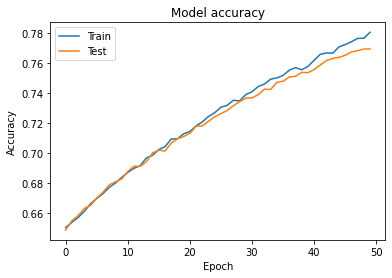

In [139]:
#Plot train vs test accuracy
accuracy_plot(history)

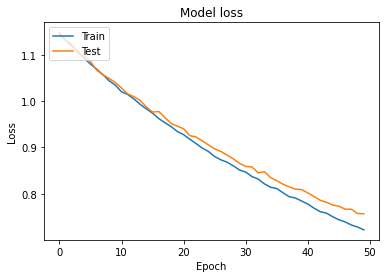

In [140]:
#Plot train vs test loss
loss_plot(history)

In [141]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Norm_with SGD'], 'accuracy': results[1]*100},index={'7'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.000000
2,NN with Adam,10.000000
3,NN_wt_init_with SGD,10.000000
4,NN_wt_init_with Adam,10.000000
5,NN_Relu_activation_with SGD,10.000000
6,NN_Relu_activation_with Adam,10.000000
7,NN_Batch_Norm_with SGD,76.956666


#### Using Adam optimizer, repeat the steps above

In [0]:
#Setting the learning rate  and decay in sgd
adam = optimizers.Adam(lr = 0.001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [143]:
#Fit the model
history = keras_model_3.fit(X_train, y_train, epochs=50, batch_size=200)

Epoch 1/50
42000/42000 [==============================] - 3s 73us/step - loss: 1.1216 - accuracy: 0.6383
Epoch 2/50
42000/42000 [==============================] - 2s 52us/step - loss: 0.8490 - accuracy: 0.7320
Epoch 3/50
42000/42000 [==============================] - 2s 53us/step - loss: 0.7313 - accuracy: 0.7683
Epoch 4/50
42000/42000 [==============================] - 2s 52us/step - loss: 0.6521 - accuracy: 0.7920
Epoch 5/50
42000/42000 [==============================] - 2s 52us/step - loss: 0.6044 - accuracy: 0.8079
Epoch 6/50
42000/42000 [==============================] - 2s 52us/step - loss: 0.5570 - accuracy: 0.8245
Epoch 7/50
42000/42000 [==============================] - 2s 52us/step - loss: 0.5223 - accuracy: 0.8328
Epoch 8/50
42000/42000 [==============================] - 2s 54us/step - loss: 0.4867 - accuracy: 0.8466
Epoch 9/50
42000/42000 [==============================] - 2s 53us/step - loss: 0.4557 - accuracy: 0.8561
Epoch 10/50
42000/42000 [==============================

In [144]:
#Using val data as validation data.
history = keras_model_3.fit(X_train, y_train,validation_data = (X_val,y_val), epochs=50, batch_size=200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 3s 78us/step - loss: 0.1079 - accuracy: 0.9647 - val_loss: 0.9602 - val_accuracy: 0.7714
Epoch 2/50
42000/42000 [==============================] - 3s 75us/step - loss: 0.0965 - accuracy: 0.9679 - val_loss: 0.8216 - val_accuracy: 0.8024
Epoch 3/50
42000/42000 [==============================] - 3s 75us/step - loss: 0.1026 - accuracy: 0.9655 - val_loss: 0.6027 - val_accuracy: 0.8479
Epoch 4/50
42000/42000 [==============================] - 3s 75us/step - loss: 0.0836 - accuracy: 0.9726 - val_loss: 0.6295 - val_accuracy: 0.8466
Epoch 5/50
42000/42000 [==============================] - 3s 74us/step - loss: 0.0863 - accuracy: 0.9725 - val_loss: 0.5765 - val_accuracy: 0.8501
Epoch 6/50
42000/42000 [==============================] - 3s 75us/step - loss: 0.0808 - accuracy: 0.9730 - val_loss: 0.6442 - val_accuracy: 0.8429
Epoch 7/50
42000/42000 [==============================] - 3s 74us/st

In [145]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = keras_model_3.predict_classes(X_val)

test = convert_to_label(y_val)

accuracy(y_pred, test)

Accuracy is: 87.13666666666666


In [146]:
#Plot confusion matrix
conf_matrix(y_pred, test)

True          0     1     2     3     4     5     6     7     8     9
Predicted                                                            
0          5430   148    22    18    14     7   104    30    68   159
1            70  5328    75   120    54    23    52    95   107    76
2            44   111  5317    30    34    14    48   232    76    94
3            61   177   150  4745    31   271    90    85   223   167
4            95   149    49    41  5306    19    90    22   108   121
5            29    52    31   106    21  4939   448    27   141   206
6           115    87    29    14    42    96  5325    44   160    88
7            39   168   251    26    16    13    25  5332    26   104
8           127   117    38    39    26    47   269    33  5145   159
9           143    83    56    37    37    40    40    37   112  5415


In [147]:
#Print classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      6153
           1       0.89      0.83      0.86      6420
           2       0.89      0.88      0.88      6018
           3       0.79      0.92      0.85      5176
           4       0.88      0.95      0.92      5581
           5       0.82      0.90      0.86      5469
           6       0.89      0.82      0.85      6491
           7       0.89      0.90      0.89      5937
           8       0.86      0.83      0.85      6166
           9       0.90      0.82      0.86      6589

    accuracy                           0.87     60000
   macro avg       0.87      0.87      0.87     60000
weighted avg       0.87      0.87      0.87     60000



In [148]:
#Evaluate the model and calculate accuracy
results = keras_model_3.evaluate(X_val, y_val)

60000/60000 [==============================] - 5s 82us/step


In [149]:
print('Val accuracy using batch_norm and Adam: ', results[1] * 100)

Val accuracy using batch_norm and Adam:  87.13666796684265


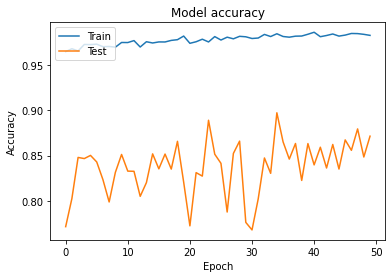

In [150]:
#Plot train vs test accuracy
accuracy_plot(history)

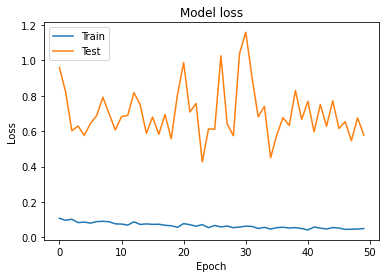

In [151]:
#Plot train vs test loss
loss_plot(history)

In [152]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Norm_with Adam'], 'accuracy': results[1]*100},index={'8'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.000000
2,NN with Adam,10.000000
3,NN_wt_init_with SGD,10.000000
4,NN_wt_init_with Adam,10.000000
5,NN_Relu_activation_with SGD,10.000000
6,NN_Relu_activation_with Adam,10.000000
7,NN_Batch_Norm_with SGD,76.956666
8,NN_Batch_Norm_with Adam,87.136668


**Observation:** The performance has improved using batch normalization and Adam optimizer.

#### 4. Dropout

In [0]:
keras_model_4 = Sequential()

# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_4.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_4.add(Dense(300,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_4.add(Dense(200, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_4.add(Dense(150, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_4.add(Dense(100, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 5
#Adding fifth Hidden layer
keras_model_4.add(Dense(50, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 6
#Adding sixth Hidden layer
keras_model_4.add(Dense(30, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_4.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_4.add(Activation('softmax'))

In [154]:
#To visualize neural network
keras_model_4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
activation_56 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 300)               153900    
_________________________________________________________________
batch_normalization_9 (Batch (None, 300)               1200      
_________________________________________________________________
activation_57 (Activation)   (None, 300)              

In [0]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.sgd(lr = 0.001)
# compiling the ANN classifier
keras_model_4.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [156]:
#Fit the model
history = keras_model_4.fit(X_train, y_train, epochs=50, batch_size=200)

Epoch 1/50
42000/42000 [==============================] - 2s 58us/step - loss: 2.6381 - accuracy: 0.1002
Epoch 2/50
42000/42000 [==============================] - 2s 41us/step - loss: 2.6202 - accuracy: 0.0997
Epoch 3/50
42000/42000 [==============================] - 2s 41us/step - loss: 2.5784 - accuracy: 0.1038
Epoch 4/50
42000/42000 [==============================] - 2s 41us/step - loss: 2.5537 - accuracy: 0.1013
Epoch 5/50
42000/42000 [==============================] - 2s 41us/step - loss: 2.5409 - accuracy: 0.1027
Epoch 6/50
42000/42000 [==============================] - 2s 42us/step - loss: 2.5246 - accuracy: 0.1027
Epoch 7/50
42000/42000 [==============================] - 2s 42us/step - loss: 2.5096 - accuracy: 0.1037
Epoch 8/50
42000/42000 [==============================] - 2s 41us/step - loss: 2.4993 - accuracy: 0.1047
Epoch 9/50
42000/42000 [==============================] - 2s 40us/step - loss: 2.4848 - accuracy: 0.1080
Epoch 10/50
42000/42000 [==============================

In [157]:
#Using val data as validation data.
history = keras_model_4.fit(X_train, y_train,validation_data = (X_val,y_val), epochs=50, batch_size=200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 3s 66us/step - loss: 2.3135 - accuracy: 0.1275 - val_loss: 2.2182 - val_accuracy: 0.1922
Epoch 2/50
42000/42000 [==============================] - 3s 64us/step - loss: 2.3130 - accuracy: 0.1309 - val_loss: 2.2160 - val_accuracy: 0.1940
Epoch 3/50
42000/42000 [==============================] - 3s 63us/step - loss: 2.3106 - accuracy: 0.1317 - val_loss: 2.2131 - val_accuracy: 0.1964
Epoch 4/50
42000/42000 [==============================] - 3s 64us/step - loss: 2.3064 - accuracy: 0.1354 - val_loss: 2.2110 - val_accuracy: 0.1966
Epoch 5/50
42000/42000 [==============================] - 3s 64us/step - loss: 2.3045 - accuracy: 0.1321 - val_loss: 2.2077 - val_accuracy: 0.1993
Epoch 6/50
42000/42000 [==============================] - 3s 63us/step - loss: 2.3010 - accuracy: 0.1357 - val_loss: 2.2048 - val_accuracy: 0.2018
Epoch 7/50
42000/42000 [==============================] - 3s 64us/st

In [158]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = keras_model_4.predict_classes(X_val)

test = convert_to_label(y_val)

accuracy(y_pred, test)

Accuracy is: 30.061666666666664


In [159]:
#Plot the confusion matrix
conf_matrix(y_pred, test)

True          0     1     2     3     4    5     6     7    8     9
Predicted                                                          
0          1389   127   393   869    64  160  1422    41  699   836
1           331  2600   638   618   253   71   188   723  295   283
2           316   116  2620   776    32   84   129  1514  153   260
3           663   244  1411  1596    65  278   586   337  394   426
4           697  1107   239   550  1608   84   832    38  576   269
5          1033   142   408  1154    62  331  1633    73  625   539
6          1153    98   221   665   135  112  2597    34  662   323
7           210   115  1664   442    23   48    82  3147  122   147
8          1126   165   270   853   110  125  1916    48  886   501
9           812   160   682  1136    78  185   822   174  688  1263


In [160]:
#Print classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.23      0.18      0.20      7730
           1       0.43      0.53      0.48      4874
           2       0.44      0.31      0.36      8546
           3       0.27      0.18      0.22      8659
           4       0.27      0.66      0.38      2430
           5       0.06      0.22      0.09      1478
           6       0.43      0.25      0.32     10207
           7       0.52      0.51      0.52      6129
           8       0.15      0.17      0.16      5100
           9       0.21      0.26      0.23      4847

    accuracy                           0.30     60000
   macro avg       0.30      0.33      0.30     60000
weighted avg       0.33      0.30      0.31     60000



In [161]:
#Evaluate the model and calculate accuracy
results = keras_model_4.evaluate(X_val, y_val)

60000/60000 [==============================] - 5s 86us/step


In [162]:
print('Val accuracy using Dropout and SGD: ', results[1] * 100)

Val accuracy using Dropout and SGD:  30.061665177345276


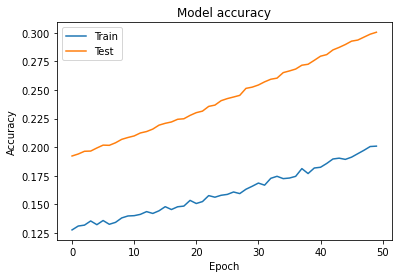

In [163]:
#Plot train Vs test accuracy
accuracy_plot(history)

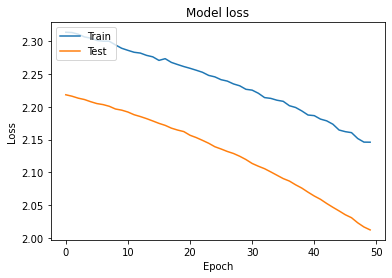

In [164]:
#Plot train Vs test loss
loss_plot(history)

In [165]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Dropout_with SGD'], 'accuracy': results[1]*100},index={'9'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.000000
2,NN with Adam,10.000000
3,NN_wt_init_with SGD,10.000000
4,NN_wt_init_with Adam,10.000000
5,NN_Relu_activation_with SGD,10.000000
6,NN_Relu_activation_with Adam,10.000000
7,NN_Batch_Norm_with SGD,76.956666
8,NN_Batch_Norm_with Adam,87.136668
9,NN_Dropout_with SGD,30.061665


#### Using Adam optimizer, repeat the steps above

In [0]:
#Setting the learning rate  and decay in sgd
adam = optimizers.Adam(lr = 0.001)
# compiling the ANN classifier
keras_model_4.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [167]:
#Fit the model.
history = keras_model_4.fit(X_train, y_train, epochs=50, batch_size=200)

Epoch 1/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.9358 - accuracy: 0.2771
Epoch 2/50
42000/42000 [==============================] - 2s 54us/step - loss: 1.6309 - accuracy: 0.4104
Epoch 3/50
42000/42000 [==============================] - 2s 56us/step - loss: 1.3992 - accuracy: 0.5222
Epoch 4/50
42000/42000 [==============================] - 2s 56us/step - loss: 1.2264 - accuracy: 0.5978
Epoch 5/50
42000/42000 [==============================] - 2s 55us/step - loss: 1.1153 - accuracy: 0.6415
Epoch 6/50
42000/42000 [==============================] - 2s 55us/step - loss: 1.0406 - accuracy: 0.6720
Epoch 7/50
42000/42000 [==============================] - 2s 54us/step - loss: 0.9901 - accuracy: 0.6915
Epoch 8/50
42000/42000 [==============================] - 2s 54us/step - loss: 0.9390 - accuracy: 0.7125
Epoch 9/50
42000/42000 [==============================] - 2s 54us/step - loss: 0.8939 - accuracy: 0.7343
Epoch 10/50
42000/42000 [==============================

In [168]:
#Using val data as validation data.
history = keras_model_4.fit(X_train, y_train,validation_data = (X_val,y_val), epochs=50, batch_size=200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 3s 82us/step - loss: 0.4309 - accuracy: 0.8738 - val_loss: 0.6180 - val_accuracy: 0.8026
Epoch 2/50
42000/42000 [==============================] - 3s 78us/step - loss: 0.4304 - accuracy: 0.8751 - val_loss: 0.6479 - val_accuracy: 0.7963
Epoch 3/50
42000/42000 [==============================] - 3s 77us/step - loss: 0.4338 - accuracy: 0.8749 - val_loss: 0.8374 - val_accuracy: 0.7255
Epoch 4/50
42000/42000 [==============================] - 3s 77us/step - loss: 0.4250 - accuracy: 0.8768 - val_loss: 0.6217 - val_accuracy: 0.8058
Epoch 5/50
42000/42000 [==============================] - 3s 77us/step - loss: 0.4156 - accuracy: 0.8793 - val_loss: 0.5330 - val_accuracy: 0.8360
Epoch 6/50
42000/42000 [==============================] - 3s 78us/step - loss: 0.4104 - accuracy: 0.8799 - val_loss: 0.5833 - val_accuracy: 0.8165
Epoch 7/50
42000/42000 [==============================] - 3s 77us/st

In [169]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = keras_model_4.predict_classes(X_val)

test = convert_to_label(y_val)

accuracy(y_pred, test)

Accuracy is: 82.51166666666667


In [170]:
#plot confusion matrix
conf_matrix(y_pred, test)

True          0     1     2     3     4     5     6     7     8     9
Predicted                                                            
0          4712    24   111   146     7    26   403    34   492    45
1            37  4555   168   420    66    67    59   147   460    21
2            16     9  5401   158     7    36    14    72   260    27
3             6    16   113  5247     5   270    34    24   275    10
4            49    52   157   131  4598   160   241    16   549    47
5             9     5    20   278     6  5272   163    12   218    17
6            32     9    24    71    14   178  5260    17   390     5
7            10    60   472   181    12    48    48  5050   109    10
8            21    23    75   168     3   128   199    11  5354    18
9            46    16   250   412     7   331    32    33   815  4058


In [171]:
#Print classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      4938
           1       0.76      0.96      0.85      4769
           2       0.90      0.80      0.84      6791
           3       0.87      0.73      0.79      7212
           4       0.77      0.97      0.86      4725
           5       0.88      0.81      0.84      6516
           6       0.88      0.82      0.84      6453
           7       0.84      0.93      0.88      5416
           8       0.89      0.60      0.72      8922
           9       0.68      0.95      0.79      4258

    accuracy                           0.83     60000
   macro avg       0.83      0.85      0.83     60000
weighted avg       0.84      0.83      0.82     60000



In [172]:
#Evaluate the model and calculate accuracy
results = keras_model_4.evaluate(X_val, y_val)

60000/60000 [==============================] - 5s 85us/step


In [173]:
print('Val accuracy using Dropout and Adam: ', results[1] * 100)

Val accuracy using Dropout and Adam:  82.51166939735413


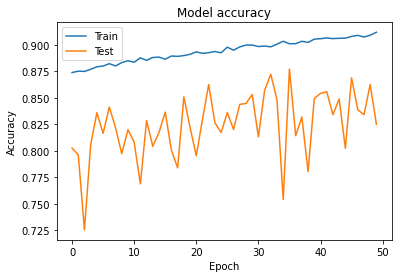

In [174]:
#Plot train Vs test accuracy
accuracy_plot(history)

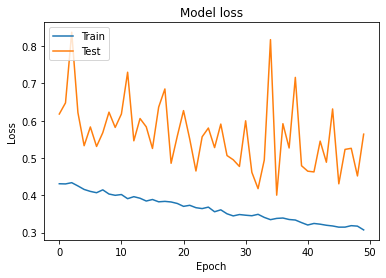

In [175]:
#Plot train Vs test loss
loss_plot(history)

In [176]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Dropout_with Adam'], 'accuracy': results[1]*100},index={'10'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.000000
2,NN with Adam,10.000000
3,NN_wt_init_with SGD,10.000000
4,NN_wt_init_with Adam,10.000000
5,NN_Relu_activation_with SGD,10.000000
6,NN_Relu_activation_with Adam,10.000000
7,NN_Batch_Norm_with SGD,76.956666
8,NN_Batch_Norm_with Adam,87.136668
9,NN_Dropout_with SGD,30.061665
10,NN_Dropout_with Adam,82.511669


**Observation:** The dropout regularization has good accuracy with Adam optimizer but it is still less than Batch normalization with Adam optimizer.

### Testing Neural Networks on Test Data

Since Batch Normalization with Adam did better on validation data, we would use the same model on test data as well

In [177]:
#Using test data as validation data.
history = keras_model_3.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=200)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 60us/step - loss: 0.0482 - accuracy: 0.9840 - val_loss: 1.1783 - val_accuracy: 0.7866
Epoch 2/100
42000/42000 [==============================] - 3s 61us/step - loss: 0.0422 - accuracy: 0.9855 - val_loss: 1.1042 - val_accuracy: 0.7990
Epoch 3/100
42000/42000 [==============================] - 3s 60us/step - loss: 0.0346 - accuracy: 0.9886 - val_loss: 1.1826 - val_accuracy: 0.7873
Epoch 4/100
42000/42000 [==============================] - 3s 63us/step - loss: 0.0453 - accuracy: 0.9845 - val_loss: 1.1608 - val_accuracy: 0.7771
Epoch 5/100
42000/42000 [==============================] - 3s 60us/step - loss: 0.0437 - accuracy: 0.9859 - val_loss: 1.0817 - val_accuracy: 0.8018
Epoch 6/100
42000/42000 [==============================] - 3s 61us/step - loss: 0.0425 - accuracy: 0.9855 - val_loss: 1.1388 - val_accuracy: 0.7947
Epoch 7/100
42000/42000 [==============================] - 3s 

In [178]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = keras_model_3.predict_classes(X_test)

test = convert_to_label(y_test)

accuracy(y_pred, test)

Accuracy is: 82.28333333333333


In [179]:
#Plot the confusion matrix
conf_matrix(y_pred, test)

True          0     1     2     3     4     5     6     7     8     9
Predicted                                                            
0          1513    36    23    37    23    15    44    30    37    56
1            32  1487    35    47    67    27    25    56    30    22
2            13    28  1558    44    30    17     8    40    33    32
3            13    43    49  1382    26   105    27    23    27    24
4            16    34    18    35  1603    17    27     8    29    25
5            13    19    21   126    20  1414    73    12    42    28
6            41    18    21    28    41    83  1492    11    82    15
7            17    68    58    41    19    14    18  1559     8     6
8            33    37    44    80    30    31   128     9  1373    47
9            56    45    42    68    30    42    19    23    49  1430


In [180]:
#Print the classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1747
           1       0.81      0.82      0.82      1815
           2       0.86      0.83      0.85      1869
           3       0.80      0.73      0.77      1888
           4       0.88      0.85      0.87      1889
           5       0.80      0.80      0.80      1765
           6       0.81      0.80      0.81      1861
           7       0.86      0.88      0.87      1771
           8       0.76      0.80      0.78      1710
           9       0.79      0.85      0.82      1685

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



In [181]:
#Evaluate the model and calculate accuracy
results = keras_model_3.evaluate(X_test, y_test)

18000/18000 [==============================] - 2s 84us/step


In [182]:
print('Val accuracy using batch_norm and Adam: ', results[1] * 100)

Val accuracy using batch_norm and Adam:  82.28333592414856


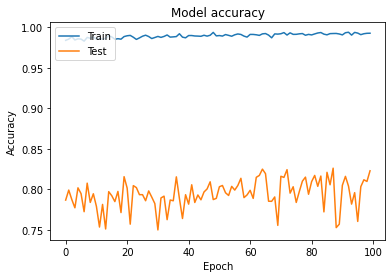

In [183]:
#Plot train Vs test accuracy
accuracy_plot(history)

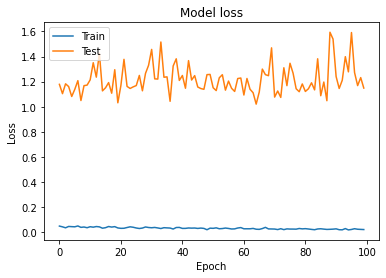

In [184]:
#Plot train vs test loss
loss_plot(history)

In [185]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Norm_with Adam_on_Test_Data'], 'accuracy': results[1]*100},index={'11'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.000000
2,NN with Adam,10.000000
3,NN_wt_init_with SGD,10.000000
4,NN_wt_init_with Adam,10.000000
5,NN_Relu_activation_with SGD,10.000000
6,NN_Relu_activation_with Adam,10.000000
7,NN_Batch_Norm_with SGD,76.956666
8,NN_Batch_Norm_with Adam,87.136668
9,NN_Dropout_with SGD,30.061665
10,NN_Dropout_with Adam,82.511669


**Observation:** The model has performed extremely well on training data 99.28% while the test data has an accuracy of 82.28%. Let's train the dataset using CNN.

### Predicting the digits using NN classifier on test data

9

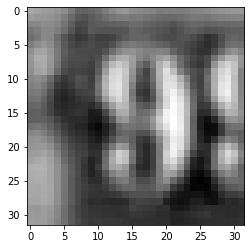

In [186]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')

#Predicting the digits
keras_model_3.predict_classes(X_test)[5]

## Approach 2 - Build Convoluted Neural Network (CNN)

#### Read the HDF5 file and split into train and test dataset

In [0]:
hf = h5py.File('/content/drive/My Drive/DLCP/Project 1/data/SVHN_single_grey1.h5', 'r')

In [192]:
# Get and print list of datasets within the H5 file
datasetNames = [n for n in hf.keys()]
for n in datasetNames:
    print(n)

X_test
X_train
X_val
y_test
y_train
y_val


In [0]:
#Get train and test data from HDF5 file 
X_train = hf['X_train'][:]
y_train = hf['y_train'][:]
X_test  = hf['X_test'][:]
y_test  = hf['y_test'][:]
X_val  = hf['X_val'][:]
y_val  = hf['y_val'][:]

In [194]:
# Get the shape of train data
X_train = np.array(X_train)
print("Shape of X_train is :", X_train.shape)

y_train = np.array(y_train)
print("Shape of y_train is :", y_train.shape)

Shape of X_train is : (42000, 32, 32)
Shape of y_train is : (42000,)


In [195]:
# Get the shape of test data
X_test = np.array(X_test)
print("Shape of X_test is :", X_test.shape)

y_test = np.array(y_test)
print("Shape of y_test is :", y_test.shape)

Shape of X_test is : (18000, 32, 32)
Shape of y_test is : (18000,)


In [196]:
# Get the shape of val data
X_val = np.array(X_val)
print("Shape of X_val is :", X_val.shape)

y_val = np.array(y_val)
print("Shape of y_val is :", y_val.shape)

Shape of X_val is : (60000, 32, 32)
Shape of y_val is : (60000,)


In [0]:
#Close the file
hf.close()

### Reshape train and test sets into shapes compatible with keras models
#### Keras expects data to be in the format (N_E.N_H,N_W,N_C) N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.

In [0]:
# input image dimensions
img_rows, img_cols = 32, 32

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

### Pre-processing the dataset
#### Normalizing the input

In [199]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (42000, 32, 32, 1)
x_test shape: (18000, 32, 32, 1)
42000 train samples
18000 test samples


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [201]:
print(y_train[0])

2


#### Convert Labels from digits to one hot vectors

In [202]:
# convert class vectors to binary class matrices
y_train_c1 = to_categorical(y_train, num_classes)
y_test_c1 = to_categorical(y_test, num_classes)
print(y_train_c1[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Building the CNN
#### Define the layers of model

### Without Batch Normalization

In [0]:
#without batch normalization
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
#                 padding='same',
                 input_shape=input_shape))
#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, (3, 3), activation='relu'))
#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))
#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu'))
#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu'))
#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25))

#Add a Convolutional Layer with 196 filters of size 3X3 and activation function as 'ReLU' 
#model.add(Conv2D(196, (3, 3), activation='relu'))
#Apply Dropout with 0.25 probability 
#model.add(Dropout(0.25))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 512 units and activation function as 'ReLU'
model.add(Dense(512, activation='relu'))
#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax'))

In [204]:
#Summary of the model
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 64)        

#### Setting Optimizer and Loss function for training

In [0]:
#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = optimizers.Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

### Training the CNN

#### Initializing the Tensorboard callback for visualization of training

In [0]:
#Import tensorboard callback which will passed in model.fit function.
from keras.callbacks import TensorBoard
from time import time


#Setting the directory to store the logs.
tensorboard = TensorBoard(log_dir=".logs/{}".format(time()))

#### Initializing Early stopping and Model chekpoint callbacks 

In [0]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('SVHN_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

#### Fit the model to the dataset

In [208]:
#Training on the dataset and adding the all the callbacks to the fit function.
#Once the training starts, results start appearing on Tensorboard after 1 epoch
history = model.fit(x_train, y_train_c1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_c1),
          callbacks=[tensorboard,early_stopping,model_checkpoint])

Train on 42000 samples, validate on 18000 samples
Epoch 1/12
42000/42000 [==============================] - 8s 194us/step - loss: 1.6484 - accuracy: 0.4036 - val_loss: 0.7992 - val_accuracy: 0.7579

Epoch 00001: val_loss improved from inf to 0.79919, saving model to SVHN_cnn_checkpoint_01_loss0.7992.h5
Epoch 2/12
42000/42000 [==============================] - 3s 77us/step - loss: 0.7460 - accuracy: 0.7660 - val_loss: 0.5446 - val_accuracy: 0.8334

Epoch 00002: val_loss improved from 0.79919 to 0.54458, saving model to SVHN_cnn_checkpoint_02_loss0.5446.h5
Epoch 3/12
42000/42000 [==============================] - 3s 77us/step - loss: 0.5669 - accuracy: 0.8241 - val_loss: 0.4066 - val_accuracy: 0.8752

Epoch 00003: val_loss improved from 0.54458 to 0.40659, saving model to SVHN_cnn_checkpoint_03_loss0.4066.h5
Epoch 4/12
42000/42000 [==============================] - 3s 78us/step - loss: 0.4927 - accuracy: 0.8457 - val_loss: 0.3798 - val_accuracy: 0.8845

Epoch 00004: val_loss improved fro

### Evaluating the CNN

#### Evaluate trained model on the test set

In [209]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = model.predict_classes(x_test)
test = convert_to_label(y_test_c1)
accuracy(y_pred, test)

Accuracy is: 91.73333333333333


In [210]:
#Plot the confusion matrix
conf_matrix(y_pred, test)

True          0     1     2     3     4     5     6     7     8     9
Predicted                                                            
0          1726    25     6     2     6     0    15     8     6    20
1            36  1612    15     6    52     6    16    67    17     1
2            12     8  1684     7    16     3     3    40    13    17
3             8    12    21  1457    14    90    21    33    46    17
4             7    26    11     4  1704     5    15     5    15    20
5             2     6     5    30     3  1647    49     5    13     8
6            37     4     9     5    15    37  1686     5    31     3
7             8    18    13    10    11     2     9  1731     3     3
8            21     9     8    14     5    11    81     7  1637    19
9            46     9    23    15    12    18     9    19    25  1628


In [211]:
#Print the classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1903
           1       0.88      0.93      0.91      1729
           2       0.93      0.94      0.94      1795
           3       0.85      0.94      0.89      1550
           4       0.94      0.93      0.93      1838
           5       0.93      0.91      0.92      1819
           6       0.92      0.89      0.90      1904
           7       0.96      0.90      0.93      1920
           8       0.90      0.91      0.90      1806
           9       0.90      0.94      0.92      1736

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



In [212]:
#Evaluate the model and calculate accuracy
results = model.evaluate(x_test, y_test_c1)

18000/18000 [==============================] - 1s 73us/step


In [213]:
print('Loss using CNN:', results[0] * 100)
print('Accuracy using CNN: ', results[1] * 100)

Loss using CNN: 27.004386126001677
Accuracy using CNN:  91.73333048820496


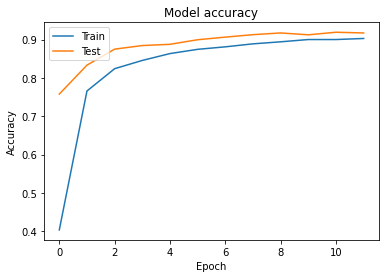

In [214]:
#Plot train Vs test accuracy
accuracy_plot(history)

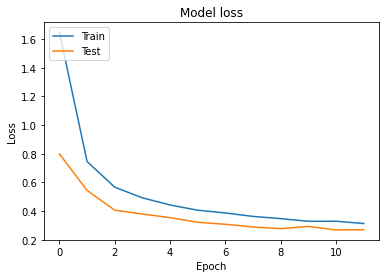

In [215]:
#Plot train vs test loss
loss_plot(history)

In [216]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['CNN_without_batch_norm'], 'accuracy': results[1]*100},index={'12'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.000000
2,NN with Adam,10.000000
3,NN_wt_init_with SGD,10.000000
4,NN_wt_init_with Adam,10.000000
5,NN_Relu_activation_with SGD,10.000000
6,NN_Relu_activation_with Adam,10.000000
7,NN_Batch_Norm_with SGD,76.956666
8,NN_Batch_Norm_with Adam,87.136668
9,NN_Dropout_with SGD,30.061665
10,NN_Dropout_with Adam,82.511669


### With Batch Normalization

In [0]:
#with batch normalization

#Initialize the model
model_1 = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model_1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
#                 padding='same',
                 input_shape=input_shape))
#Batch Normalization
model_1.add(BatchNormalization())
#Add a MaxPooling Layer of size 2X2 
model_1.add(MaxPooling2D(pool_size=(2, 2)))

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model_1.add(Conv2D(32, (3, 3), activation='relu'))
#Batch Normalization
model_1.add(BatchNormalization())
#Add a MaxPooling Layer of size 2X2 
model_1.add(MaxPooling2D(pool_size=(2, 2)))
#Apply Dropout with 0.25 probability 
model_1.add(Dropout(0.25))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model_1.add(Conv2D(64, (3, 3), activation='relu'))
#Batch Normalization
model_1.add(BatchNormalization())
#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model_1.add(Conv2D(64, (3, 3), activation='relu'))
#Batch Normalization
model_1.add(BatchNormalization())
#Apply Dropout with 0.25 probability 
model_1.add(Dropout(0.25))

#Add a Convolutional Layer with 196 filters of size 3X3 and activation function as 'ReLU' 
#model.add(Conv2D(196, (3, 3), activation='relu'))
#Apply Dropout with 0.25 probability 
#model.add(Dropout(0.25))

#Flatten the layer
model_1.add(Flatten())

#Add Fully Connected Layer with 512 units and activation function as 'ReLU'
model_1.add(Dense(512, activation='relu'))
#Batch Normalization
model_1.add(BatchNormalization())
#Apply Dropout with 0.5 probability 
model_1.add(Dropout(0.5))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model_1.add(Dense(num_classes, activation='softmax'))

In [218]:
#Summary of the model
model_1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 6, 6, 32)        

#### Setting Optimizer and Loss function for training

In [0]:
#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = optimizers.Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model_1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

### Training the CNN

#### Initializing the Tensorboard callback for visualization of training

In [0]:
#Import tensorboard callback which will passed in model.fit function.
from keras.callbacks import TensorBoard
from time import time


#Setting the directory to store the logs.
tensorboard = TensorBoard(log_dir=".logs/{}".format(time()))

#### Initializing Early stopping and Model chekpoint callbacks 

In [0]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('SVHN_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

#### Fit the model to the dataset

In [222]:
#Training on the dataset and adding the all the callbacks to the fit function.
#Once the training starts, results start appearing on Tensorboard after 1 epoch
history = model_1.fit(x_train, y_train_c1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_c1),
          callbacks=[tensorboard,early_stopping,model_checkpoint])

Train on 42000 samples, validate on 18000 samples
Epoch 1/12
 1536/42000 [>.............................] - ETA: 34s - loss: 3.4380 - accuracy: 0.1191

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.126448). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


42000/42000 [==============================] - 8s 199us/step - loss: 1.2845 - accuracy: 0.6123 - val_loss: 1.4921 - val_accuracy: 0.5303

Epoch 00001: val_loss improved from inf to 1.49214, saving model to SVHN_cnn_checkpoint_01_loss1.4921.h5
Epoch 2/12
42000/42000 [==============================] - 7s 171us/step - loss: 0.5990 - accuracy: 0.8164 - val_loss: 0.4534 - val_accuracy: 0.8605

Epoch 00002: val_loss improved from 1.49214 to 0.45336, saving model to SVHN_cnn_checkpoint_02_loss0.4534.h5
Epoch 3/12
42000/42000 [==============================] - 7s 170us/step - loss: 0.4761 - accuracy: 0.8537 - val_loss: 0.4211 - val_accuracy: 0.8721

Epoch 00003: val_loss improved from 0.45336 to 0.42112, saving model to SVHN_cnn_checkpoint_03_loss0.4211.h5
Epoch 4/12
42000/42000 [==============================] - 7s 170us/step - loss: 0.4170 - accuracy: 0.8710 - val_loss: 0.4160 - val_accuracy: 0.8709

Epoch 00004: val_loss improved from 0.42112 to 0.41600, saving model to SVHN_cnn_checkpoint_

### Evaluating the CNN

#### Evaluate trained model on the test set

In [223]:
#Predict the test data and convert the classes to labels and calculate model accuracy
y_pred = model_1.predict_classes(x_test)
test = convert_to_label(y_test_c1)
accuracy(y_pred, test)

Accuracy is: 92.11111111111111


In [224]:
#Plot the confusion matrix
conf_matrix(y_pred, test)

True          0     1     2     3     4     5     6     7     8     9
Predicted                                                            
0          1668    37     3     2    23     1    21    10    20    29
1             5  1723     4     7    35     5     6    20    19     4
2             4    24  1648    10    16     4     4    46    19    28
3             3    37    14  1544    16    37     8    17    32    11
4             1    47     8     7  1709     1     8     5    15    11
5             0    13     5    46    10  1634    30     3    16    11
6            11    18     7     7    22    27  1659     7    69     5
7             5    64    16    14    16     1     4  1672     7     9
8            14    24     5    25    12    10    34     5  1672    11
9            23    22     8    19    17     9    10     9    36  1651


In [225]:
#Print the classification report
class_report(y_pred, test)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1734
           1       0.94      0.86      0.90      2009
           2       0.91      0.96      0.94      1718
           3       0.90      0.92      0.91      1681
           4       0.94      0.91      0.93      1876
           5       0.92      0.95      0.93      1729
           6       0.91      0.93      0.92      1784
           7       0.92      0.93      0.93      1794
           8       0.92      0.88      0.90      1905
           9       0.92      0.93      0.92      1770

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



In [226]:
#Evaluate the model and calculate accuracy
results = model_1.evaluate(x_test, y_test_c1)

18000/18000 [==============================] - 2s 110us/step


In [227]:
print('Loss using CNN:', results[0] * 100)
print('Accuracy using CNN: ', results[1] * 100)

Loss using CNN: 26.470371235410372
Accuracy using CNN:  92.11111068725586


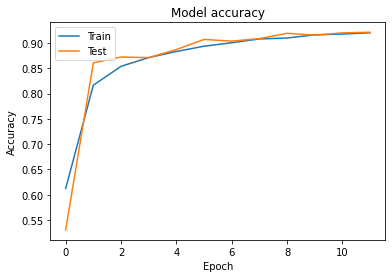

In [229]:
#Plot train Vs test accuracy
accuracy_plot(history)

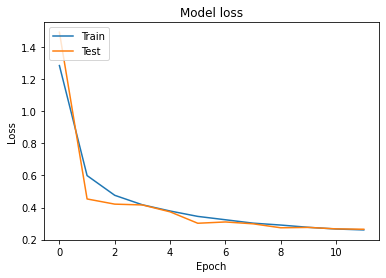

In [231]:
#Plot train vs test loss
loss_plot(history)

In [232]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['CNN_with_batch_norm'], 'accuracy': results[1]*100},index={'13'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN with SGD,10.000000
2,NN with Adam,10.000000
3,NN_wt_init_with SGD,10.000000
4,NN_wt_init_with Adam,10.000000
5,NN_Relu_activation_with SGD,10.000000
6,NN_Relu_activation_with Adam,10.000000
7,NN_Batch_Norm_with SGD,76.956666
8,NN_Batch_Norm_with Adam,87.136668
9,NN_Dropout_with SGD,30.061665
10,NN_Dropout_with Adam,82.511669


### Visualizing some predictions

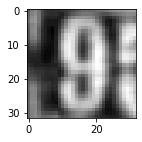

9


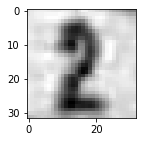

2


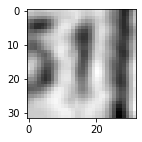

1


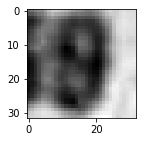

9


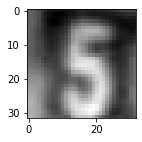

5


In [233]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[3].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[2].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[33].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[59].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[36].reshape(1,32,32,1))))

### Saving the CNN

#### Save the trained weights and model in h5 files

In [0]:
#Set the path where you want to store the model and weights. 
model.save('/content/drive/My Drive/DLCP/Project 1/data/cnn_svhn.h5')
model.save_weights('/content/drive/My Drive/DLCP/Project 1/data/cnn_svhn_weights.h5')

## Conclusion:

The feed forward network using Keras performed well with batch normalization and Adam optimizer and had an accuracy of 82.28% while the convoluted neural network with batch normalization performed very well with an accuracy of 92.11%.

The run time taken by CNN is also less compared to feed forward network.